# Exothermic Continuous Stirred Tank Reactor

This example is intended as an introduction to the nonlinear dynamics of an exothermic continuous stirred-tank reactor. The example has been studied by countless researchers and students since the pioneering work of Amundson and Aris in the 1950's. The particular formulation and parameter values described below are taken from example 2.5 from Seborg, Edgar, Mellichamp and Doyle (SEMD).

![Continuous](../images/408px-Agitated_vessel.png)

## Model Equations

The model

\begin{align*}
V\frac{dc_A}{dt} & = q(c_{Ai}-c_A)-Vkc_A \\
V\rho C_p\frac{dT}{dt} & = wC_p(T_i-T) + (-\Delta H_R)Vkc_A + UA(T_c-T)
\end{align*}

Normalizing the equations to isolate the time rates of change of $c_A$ and $T$ give

\begin{align*}
\frac{dc_A}{dt} & = \frac{q}{V}(c_{Ai} - c_A)- kc_A \\
\frac{dT}{dt} & = \frac{q}{V}(T_i - T) + \frac{-\Delta H_R}{\rho C_p}kc_A + \frac{UA}{V\rho C_p}(T_c - T)
\end{align*}

which are the equations that will be integrated below.

### Nominal Operating Conditions (Table 2.3)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

q = 100.0       # Flowrate [L/min]
cAi = 1.0       # Inlet feed concentration [mol/L]
Ti  = 350.0     # Inlet feed temperature [K]
V   = 100.0     # Volume [L]
rho = 1000.0    # Density [g/L]
Cp   = 0.239    # Heat capacity [J/g/K]
dHr = -5.0e4    # Heat of reaction [J/mol]

ER  = 8750.0    # Ea/R [K]
k0  = 7.2e10    # Arrhenius rate constant
UA  = 5.0e4     # Heat transfer [J/min/K]
Tc  = 300.0     # Coolant temperature [K]

cA0 = 0.5;      # Initial concentration [mol/L]
T0  = 350.0;    # Initial temperature [K]

In [12]:
# Arrhenius rate expression
def k(T):
    return k0*np.exp(-ER/T)

def deriv(y,t):
    cA,T = y
    dcA = (q/V)*(cAi - cA) - k(T)*cA
    dT = (q/V)*(Ti - T) + (-dHr/rho/Cp)*k(T)*cA + (UA/V/rho/Cp)*(Tc-T)
    return [dcA,dT]

## Simulation from a Nominal Operating Point

The first simulation is  integration of the model equations.

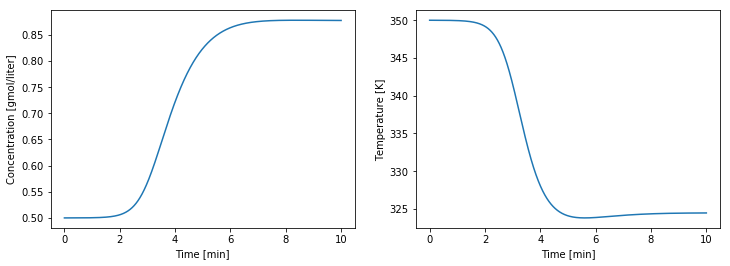

In [13]:
Tc = 300
IC = [0.5,350.0]
t = np.linspace(0,10.0,2000)
y = odeint(deriv,IC,t)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t,y[:,0])
plt.xlabel('Time [min]')
plt.ylabel('Concentration [gmol/liter]')

plt.subplot(1,2,2)
plt.plot(t,y[:,1])
plt.xlabel('Time [min]')
plt.ylabel('Temperature [K]');

## Effect of Cooling Temperature

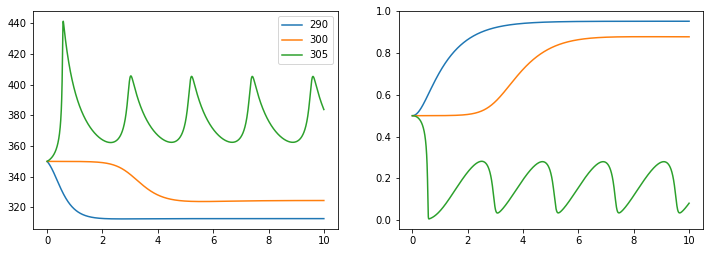

In [14]:
plt.figure(figsize=(12,4))
Tlist = [290,300,305]
for Tc in Tlist:
    y = odeint(deriv,IC,t)

    plt.subplot(1,2,1)
    plt.plot(t,y[:,1])

    plt.subplot(1,2,2)
    plt.plot(t,y[:,0])
    
plt.subplot(1,2,1)
plt.legend(Tlist)

<function __main__.sim>

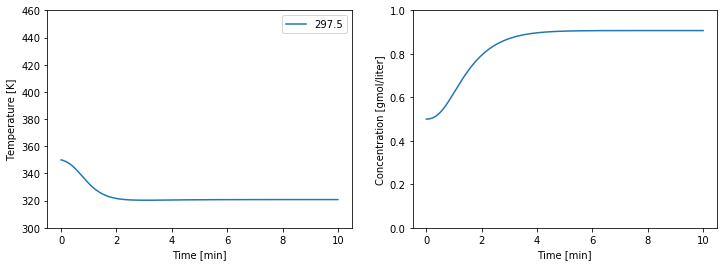

In [5]:
from ipywidgets import interact

def sim(Tcooling):
    global Tc
    Tc = Tcooling
    y = odeint(deriv,IC,t)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(t,y[:,1])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [K]')
    plt.ylim(300,460)
    plt.legend([Tc])
    
    plt.subplot(1,2,2)
    plt.plot(t,y[:,0])
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [gmol/liter]')
    plt.ylim(0,1)
    
interact(sim,Tcooling = (290.0,305.0))

## Nullclines

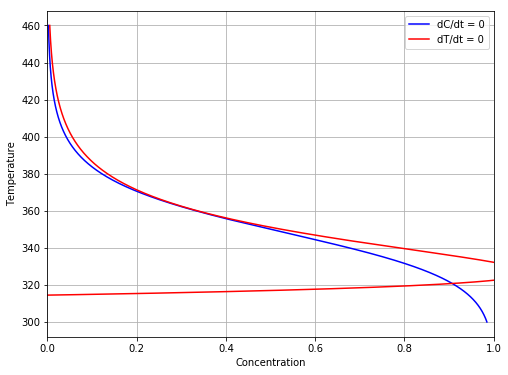

In [6]:
# plot nullclines
T = np.linspace(300.0,460.0,1000)
    
plt.figure(figsize=(8,6))
plt.plot((q/V)*cAi/((q/V) + k(T)),T,'b')
plt.plot(((q/V)*(Ti-T) + (UA/V/rho/Cp)*(Tc-T))/((dHr/rho/Cp)*k(T)),T,'r')
plt.xlim(0,1)
plt.grid()
plt.legend(['dC/dt = 0','dT/dt = 0'])
plt.xlabel('Concentration')
plt.ylabel('Temperature')


## Phase Plane Analysis

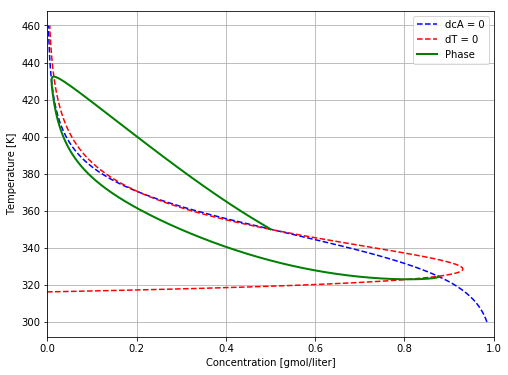

In [7]:
from ipywidgets import interact
from scipy.optimize import fsolve

def phase(Tcooling):
    # put slider value into the global Tc
    global Tc
    Tc = Tcooling
    
    # plot nullclines
    T = np.linspace(300.0,460.0,1000)
    
    plt.figure(figsize=(8,6))
    plt.plot((q/V)*cAi/((q/V) + k(T)),T,'b--')
    plt.plot(((q/V)*(Ti-T) + (UA/V/rho/Cp)*(Tc-T))/((dHr/rho/Cp)*k(T)),T,'r--')
    plt.xlim(0,1)
    plt.grid()
    
    # plot phase 
    y = odeint(deriv,IC,t)
    plt.plot(y[:,0],y[:,1],'g',lw=2)
    
    plt.legend(['dcA = 0','dT = 0','Phase'])
    plt.xlabel('Concentration [gmol/liter]')
    plt.ylabel('Temperature [K]')

interact(phase,Tcooling = (290.0,305.0))
